In [74]:
import numpy as np

In [75]:
arr = np.load('./data/imageData.npz')

In [76]:
img_list = arr['arr_0']
label_list =arr['arr_1']

In [77]:
img_list.shape,label_list.shape

((2799, 100, 100, 3), (2799,))

In [78]:
np.unique(label_list)

array(['1.yes', '2.no', '3.nose'], dtype='<U6')

In [79]:
from sklearn.preprocessing import OneHotEncoder

In [80]:
onehot = OneHotEncoder()

In [81]:
y_onehot =onehot.fit_transform(label_list.reshape(-1,1))

In [82]:
y_onehot_arr = y_onehot.toarray()

In [83]:
y_onehot_arr

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test = train_test_split(img_list,y_onehot_arr,test_size=0.2,random_state=42)

In [86]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2239, 100, 100, 3), (560, 100, 100, 3), (2239, 3), (560, 3))

In [87]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [101]:
model = Sequential(
    [layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(166,activation='relu'),
    layers.Dense(22,activation='relu'),
    layers.Dense(3,activation='sigmoid')]
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [102]:
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=20)

Epoch 1/20
75/75 [==============================] - 6s 76ms/step - loss: 0.6747 - accuracy: 0.7436 - val_loss: 0.4597 - val_accuracy: 0.8321
Epoch 2/20
75/75 [==============================] - 6s 75ms/step - loss: 0.3837 - accuracy: 0.8669 - val_loss: 0.3686 - val_accuracy: 0.8554
Epoch 3/20
75/75 [==============================] - 6s 75ms/step - loss: 0.3140 - accuracy: 0.8888 - val_loss: 0.2924 - val_accuracy: 0.8875
Epoch 4/20
75/75 [==============================] - 6s 74ms/step - loss: 0.2705 - accuracy: 0.9040 - val_loss: 0.3259 - val_accuracy: 0.8679
Epoch 5/20
75/75 [==============================] - 6s 75ms/step - loss: 0.2148 - accuracy: 0.9236 - val_loss: 0.2219 - val_accuracy: 0.9143
Epoch 6/20
75/75 [==============================] - 6s 75ms/step - loss: 0.1886 - accuracy: 0.9352 - val_loss: 0.2657 - val_accuracy: 0.8893
Epoch 7/20
75/75 [==============================] - 6s 75ms/step - loss: 0.1718 - accuracy: 0.9428 - val_loss: 0.1886 - val_accuracy: 0.9268
Epoch 8/20
75

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
history_pd = pd.DataFrame(history.history)

In [105]:
history_pd

,loss,accuracy,val_loss,val_accuracy
0,0.674671,0.743636,0.459686,0.832143
1,0.383708,0.866905,0.368565,0.855357
2,0.314020,0.888790,0.292441,0.887500
3,0.270500,0.903975,0.325935,0.867857
4,0.214755,0.923627,0.221923,0.914286
5,0.188616,0.935239,0.265673,0.889286
6,0.171846,0.942832,0.188642,0.926786
7,0.149263,0.949531,0.196261,0.928571
8,0.133827,0.957124,0.186529,0.923214
9,0.116384,0.961143,0.169920,0.932143


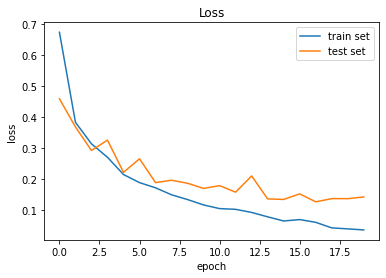

In [106]:
#cheack the loss
plt.plot(history_pd['loss'])
plt.plot(history_pd['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train set','test set'],loc='upper right')
plt.show()

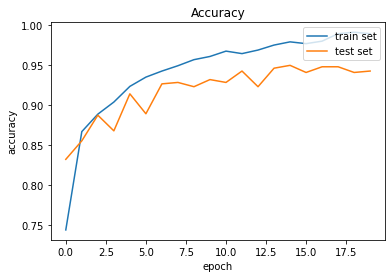

In [107]:
# cheack the accuracy
plt.plot(history_pd['accuracy'])
plt.plot(history_pd['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train set','test set'],loc='upper right')
plt.show()

In [56]:
model.save('./data/face_mask_model.h5')